<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [50]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from urllib.request import urlopen
import certifi
import json

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2025-03-025"
TODAY = date.today().strftime("%Y-%m-%d")

def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

def load_data(ticker:str, apikey):

    df = pd.DataFrame()
    # Build the URL for downloading high-frequency data
    url = "https://financialmodelingprep.com/api/v3/historical-chart/1min"
    if ticker.endswith("=X"):
        url += "/{}?apikey={}".format("USD" + ticker[:-2], apikey)
    else:
        url += "/{}?apikey={}".format(ticker, apikey)

    print("URL: ", url)
    
    json_data = get_jsonparsed_data(url)
    df =  pd.DataFrame(json_data)
    df_reversed = df.iloc[::-1].reset_index(drop=True)
    return df_reversed

In [ ]:
apikey = open(f"./apikey", "r").readline().strip()
ticker = 'AAPL'
data = load_data(ticker, apikey)
df=data
df.head()

URL:  https://financialmodelingprep.com/api/v3/historical-chart/1min/MSFT?apikey=LQ4Ifyu8MVzmtmXbL5e6pKte89lZhXcT


/tmp/ipykernel_12885/4231138179.py:5: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,open,low,high,close,volume
0,2025-03-28 15:59:00,379.11,378.57,379.11,378.82,694138
1,2025-03-28 15:58:00,379.25,378.99,379.29,379.08,223105
2,2025-03-28 15:57:00,379.25,379.24,379.54,379.25,169758
3,2025-03-28 15:56:00,379.41,379.04,379.41,379.25,151856
4,2025-03-28 15:55:00,378.97,378.78,379.45,379.43,197169


In [53]:
df.tail()

,date,open,low,high,close,volume
1165,2025-03-26 09:34:00,394.11,393.91,394.65,394.47,58616
1166,2025-03-26 09:33:00,394.26,393.99,394.54,394.02,69019
1167,2025-03-26 09:32:00,394.84,394.19,395.05,394.19,59798
1168,2025-03-26 09:31:00,395.20,394.37,395.20,394.74,80040
1169,2025-03-26 09:30:00,394.99,394.42,395.29,395.24,854335


In [54]:
df = df.drop(['date'], axis = 1)
df.head()

,open,low,high,close,volume
0,379.11,378.57,379.11,378.82,694138
1,379.25,378.99,379.29,379.08,223105
2,379.25,379.24,379.54,379.25,169758
3,379.41,379.04,379.41,379.25,151856
4,378.97,378.78,379.45,379.43,197169


Visualizing Closing Price

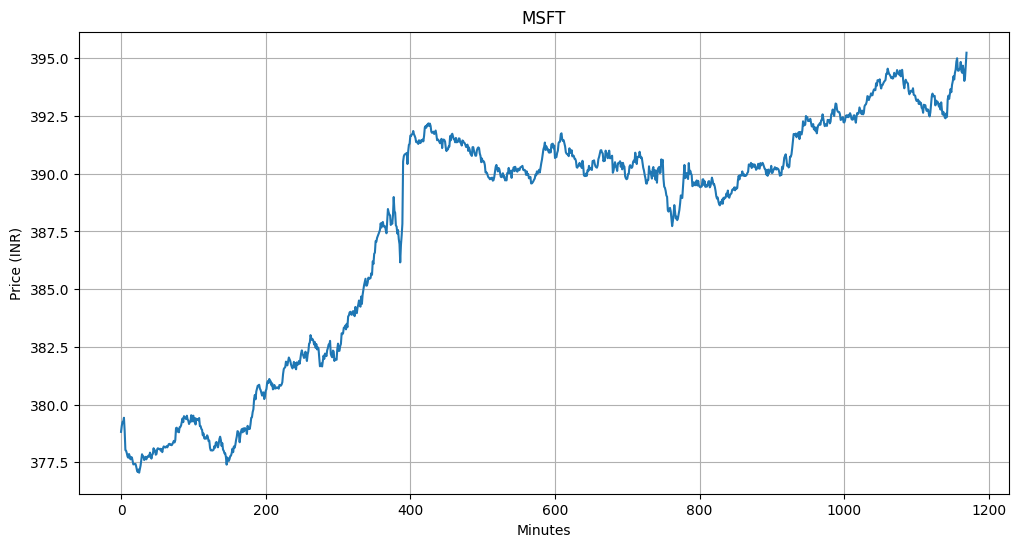

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'])
plt.title(f"{ticker}")
plt.xlabel("Minutes")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [56]:
df

,open,low,high,close,volume
0,379.11,378.57,379.11,378.82,694138
1,379.25,378.99,379.29,379.08,223105
2,379.25,379.24,379.54,379.25,169758
3,379.41,379.04,379.41,379.25,151856
4,378.97,378.78,379.45,379.43,197169
...,...,...,...,...,...
1165,394.11,393.91,394.65,394.47,58616
1166,394.26,393.99,394.54,394.02,69019
1167,394.84,394.19,395.05,394.19,59798
1168,395.20,394.37,395.20,394.74,80040


# Plotting moving averages of 100 day

---



In [57]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1165    393.5614
1166    393.5598
1167    393.5605
1168    393.5663
1169    393.5750
Name: close, Length: 1170, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

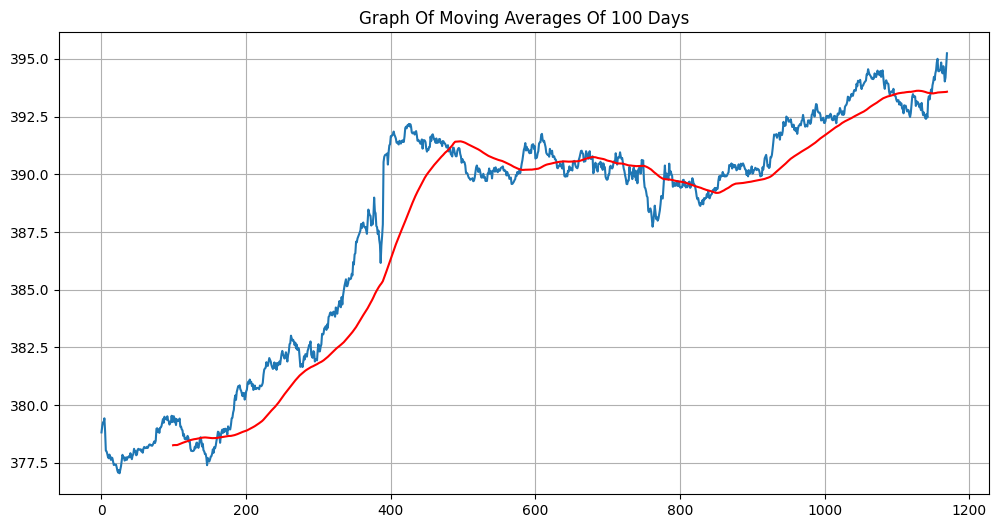

In [58]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [59]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1165    393.26275
1166    393.27195
1167    393.28230
1168    393.29445
1169    393.30895
Name: close, Length: 1170, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

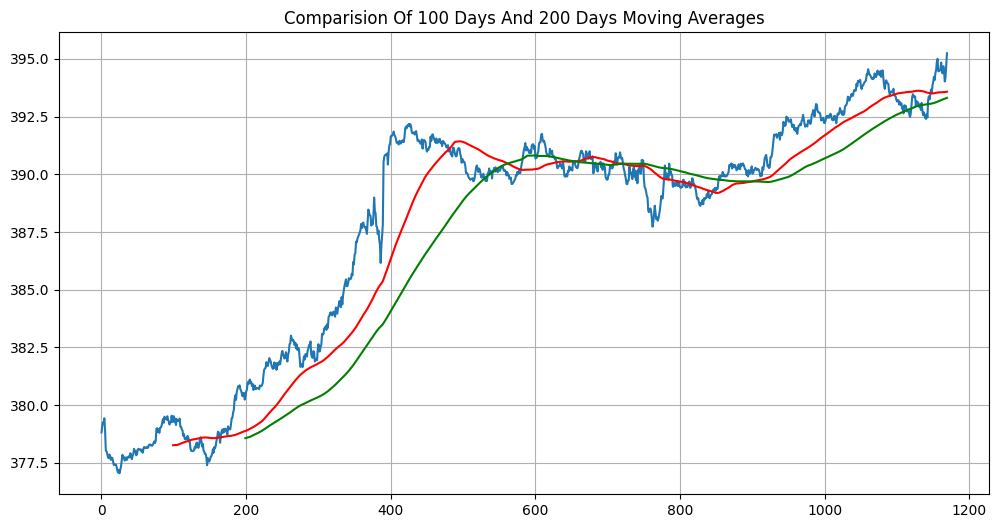

In [61]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(1170, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [62]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(819, 6)
(351, 6)


In [63]:
train.head()

,date,open,low,high,close,volume
0,2025-03-28 15:59:00,379.11,378.57,379.11,378.82,694138
1,2025-03-28 15:58:00,379.25,378.99,379.29,379.08,223105
2,2025-03-28 15:57:00,379.25,379.24,379.54,379.25,169758
3,2025-03-28 15:56:00,379.41,379.04,379.41,379.25,151856
4,2025-03-28 15:55:00,378.97,378.78,379.45,379.43,197169


In [64]:
test.head()

,date,open,low,high,close,volume
819,2025-03-26 15:20:00,389.57,389.33,389.62,389.54,30020
820,2025-03-26 15:19:00,389.41,389.41,389.60,389.55,55146
821,2025-03-26 15:18:00,389.26,389.16,389.43,389.43,41046
822,2025-03-26 15:17:00,389.04,389.04,389.26,389.26,39955
823,2025-03-26 15:16:00,388.94,388.94,389.06,389.03,21683


# Using MinMax scaler for normalization of the dataset

---



In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [73]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [74]:
train_close

array([[378.82],
       [379.08],
       [379.25],
       [379.25],
       [379.43],
       [378.86],
       [378.03],
       [378.  ],
       [377.89],
       [377.75],
       [377.7 ],
       [377.86],
       [377.77],
       [377.63],
       [377.73],
       [377.71],
       [377.55],
       [377.41],
       [377.43],
       [377.42],
       [377.43],
       [377.31],
       [377.16],
       [377.08],
       [377.19],
       [377.05],
       [377.21],
       [377.36],
       [377.62],
       [377.85],
       [377.75],
       [377.75],
       [377.6 ],
       [377.64],
       [377.74],
       [377.63],
       [377.74],
       [377.74],
       [377.79],
       [377.74],
       [377.92],
       [377.81],
       [377.66],
       [377.82],
       [377.87],
       [378.11],
       [377.98],
       [378.02],
       [377.83],
       [377.86],
       [378.07],
       [378.11],
       [378.08],
       [378.07],
       [378.09],
       [378.  ],
       [378.07],
       [377.94],
       [378.11

In [75]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.11698612],
       [0.13417052],
       [0.14540648],
       [0.14540648],
       [0.15730337],
       [0.11962987],
       [0.06477198],
       [0.06278916],
       [0.05551884],
       [0.0462657 ],
       [0.042961  ],
       [0.05353602],
       [0.04758757],
       [0.03833443],
       [0.04494382],
       [0.04362194],
       [0.03304693],
       [0.02379379],
       [0.02511566],
       [0.02445473],
       [0.02511566],
       [0.0171844 ],
       [0.00727032],
       [0.00198282],
       [0.00925314],
       [0.        ],
       [0.01057502],
       [0.02048909],
       [0.0376735 ],
       [0.05287508],
       [0.0462657 ],
       [0.0462657 ],
       [0.03635162],
       [0.03899537],
       [0.04560476],
       [0.03833443],
       [0.04560476],
       [0.04560476],
       [0.04890945],
       [0.04560476],
       [0.05750165],
       [0.05023133],
       [0.04031725],
       [0.05089227],
       [0.05419696],
       [0.07005948],
       [0.06146728],
       [0.064

In [76]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [77]:
x_train.shape

(719, 100, 1)

# ML Model (LSTM)

---



In [78]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [79]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

E0000 00:00:1743366308.286801   12885 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743366308.292814   12885 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/mnt/d/Code/Machine Learning/quantjl/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [81]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.3203 - mean_absolute_error: 0.4716
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0359 - mean_absolute_error: 0.1592
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0207 - mean_absolute_error: 0.1156
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0206 - mean_absolute_error: 0.1107
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0199 - mean_absolute_error: 0.1108
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0166 - mean_absolute_error: 0.0995
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0175 - mean_absolute_error: 0.1011
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0155 - mean_absolute_error: 0.0965
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0144 - mean_absolute_error: 0.0918
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0167 - mean_absolute_error: 0.0953
Epoch 11/100
23/23

In [ ]:
model.save(f'{ticker}_keras_model.keras')

In [86]:
test_close.shape

(351, 1)

In [87]:
past_100_days = pd.DataFrame(train_close[-100:])
past_100_days

,0
0,390.67
1,390.70
2,390.48
3,390.26
4,390.14
...,...
95,389.41
96,389.47
97,389.62
98,389.83


In [88]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [89]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [90]:
final_df.head()

,0
0,390.67
1,390.70
2,390.48
3,390.26
4,390.14


In [91]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.39147803],
       [0.3954727 ],
       [0.36617843],
       [0.33688415],
       [0.32090546],
       [0.29560586],
       [0.27696405],
       [0.24633822],
       [0.24500666],
       [0.26631158],
       [0.26631158],
       [0.3448735 ],
       [0.30492676],
       [0.31424767],
       [0.29294274],
       [0.27430093],
       [0.32623169],
       [0.34087883],
       [0.28894807],
       [0.32356858],
       [0.26764314],
       [0.31824234],
       [0.25033289],
       [0.32623169],
       [0.3355526 ],
       [0.34087883],
       [0.30625832],
       [0.30892144],
       [0.38482024],
       [0.36617843],
       [0.38215712],
       [0.27296937],
       [0.2276964 ],
       [0.22103862],
       [0.20372836],
       [0.1770972 ],
       [0.16910786],
       [0.0918775 ],
       [0.08388815],
       [0.09986684],
       [0.10519308],
       [0.08655126],
       [0.04394141],
       [0.        ],
       [0.02929427],
       [0.07057257],
       [0.12117177],
       [0.082

In [92]:
input_data.shape

(451, 1)

# Testing the model

---



In [93]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [94]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(351, 100, 1)
(351,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [95]:
# Making predictions

y_pred = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step


In [96]:
y_pred.shape

(351, 1)

In [97]:
y_test

array([0.24101198, 0.24234354, 0.22636485, 0.20372836, 0.17310253,
       0.15845539, 0.16511318, 0.14114514, 0.12516644, 0.11984021,
       0.13848202, 0.13049268, 0.15312916, 0.12916112, 0.16378162,
       0.15712383, 0.16511318, 0.16511318, 0.18774967, 0.17310253,
       0.20505992, 0.1677763 , 0.16378162, 0.17842876, 0.18508655,
       0.18908123, 0.20905459, 0.21304927, 0.21038615, 0.22370173,
       0.20639148, 0.22237017, 0.21571238, 0.21970706, 0.26631158,
       0.29027963, 0.2689747 , 0.2942743 , 0.29027963, 0.29294274,
       0.31557923, 0.29161119, 0.30093209, 0.28894807, 0.2942743 ,
       0.29027963, 0.29560586, 0.30625832, 0.31291611, 0.35552597,
       0.35286285, 0.34886818, 0.36484687, 0.3355526 , 0.35818908,
       0.35552597, 0.34221039, 0.35552597, 0.3448735 , 0.32490013,
       0.33022636, 0.33821571, 0.35952064, 0.33288948, 0.33155792,
       0.36351531, 0.35019973, 0.35818908, 0.36484687, 0.35552597,
       0.34354194, 0.33022636, 0.32756325, 0.29826897, 0.32223

In [98]:
y_pred

array([[0.30659905],
       [0.3068568 ],
       [0.30710417],
       [0.30733314],
       [0.3075092 ],
       [0.30756608],
       [0.30738285],
       [0.30682927],
       [0.305748  ],
       [0.3039253 ],
       [0.3011049 ],
       [0.29709893],
       [0.2919864 ],
       [0.28558728],
       [0.2778254 ],
       [0.269115  ],
       [0.25958222],
       [0.24971966],
       [0.23980759],
       [0.23015825],
       [0.22095111],
       [0.2125657 ],
       [0.2052047 ],
       [0.19885595],
       [0.19350524],
       [0.1890935 ],
       [0.18555076],
       [0.18283424],
       [0.18088312],
       [0.1796321 ],
       [0.179043  ],
       [0.17906275],
       [0.17963737],
       [0.18066178],
       [0.18206169],
       [0.18380743],
       [0.18588176],
       [0.18826228],
       [0.19094267],
       [0.19388583],
       [0.19722174],
       [0.20099825],
       [0.20529097],
       [0.21011199],
       [0.21542692],
       [0.22129452],
       [0.2276351 ],
       [0.234

In [99]:
scaler.scale_

array([0.13315579])

In [100]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

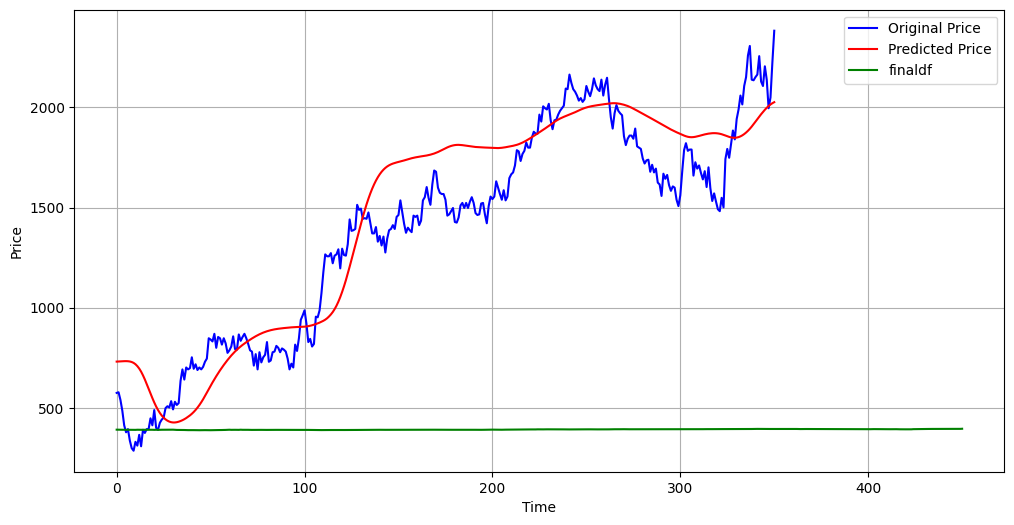

In [104]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.plot(final_df, 'g', label="finaldf")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.03%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.950721093702032


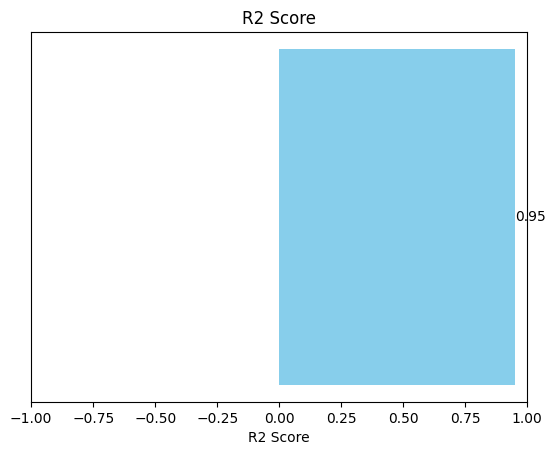

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

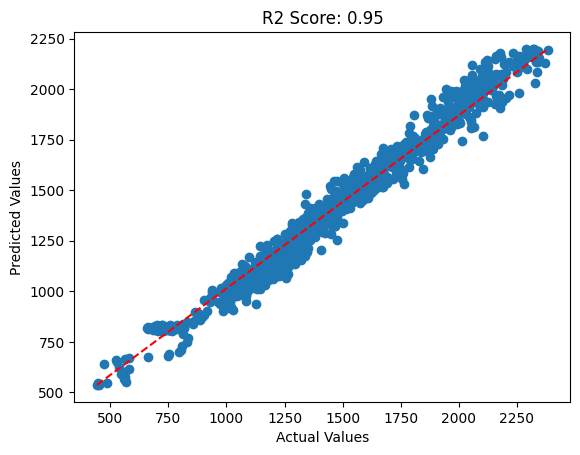

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()